In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import SGD

In [2]:
# Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) =cifar10.load_data()

num_classes = 10

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [3]:
len(x_train)

50000

In [4]:
len(y_train)

50000

In [5]:
x_test.shape

(10000, 3072)

In [6]:
y_test.shape

(10000, 10)

In [7]:
x_train[0]

array([0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
       0.28235295], dtype=float32)

In [22]:
model = Sequential([
    Dense(64,activation ='relu',input_shape=(3072,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                196672    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 199082 (777.66 KB)
Trainable params: 199082 (777.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
391/391 [==============================] - 5s 10ms/step - loss: 2.0768 - accuracy: 0.2467 - val_loss: 1.9486 - val_accuracy: 0.2942
Epoch 2/11
391/391 [==============================] - 3s 9ms/step - loss: 1.8907 - accuracy: 0.3273 - val_loss: 1.8525 - val_accuracy: 0.3394
Epoch 3/11
391/391 [==============================] - 3s 9ms/step - loss: 1.8219 - accuracy: 0.3541 - val_loss: 1.8373 - val_accuracy: 0.3409
Epoch 4/11
391/391 [==============================] - 4s 9ms/step - loss: 1.7754 - accuracy: 0.3723 - val_loss: 1.7642 - val_accuracy: 0.3760
Epoch 5/11
391/391 [==============================] - 3s 9ms/step - loss: 1.7402 - accuracy: 0.3833 - val_loss: 1.7353 - val_accuracy: 0.3827
Epoch 6/11
391/391 [==============================] - 4s 9ms/step - loss: 1.7095 - accuracy: 0.3966 - val_loss: 1.7066 - val_accuracy: 0.3974
Epoch 7/11
391/391 [==============================] - 3s 9ms/step - loss: 1.6874 - accuracy: 0.4052 - val_loss: 1.7254 - val_accuracy: 0.3935
Epoch

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6134148836135864
Test accuracy: 0.4221999943256378


In [27]:
n = 20
# plt.imshow(x_test[n].reshape(3072,), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

313/313 [==============================] - 2s 5ms/step
Actual Number:  7
Predicted Number:  4


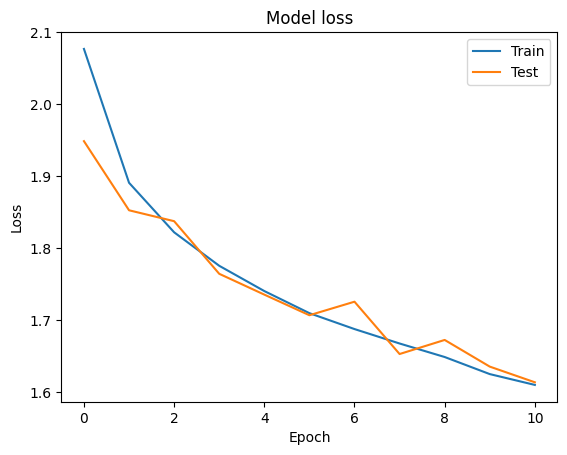

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

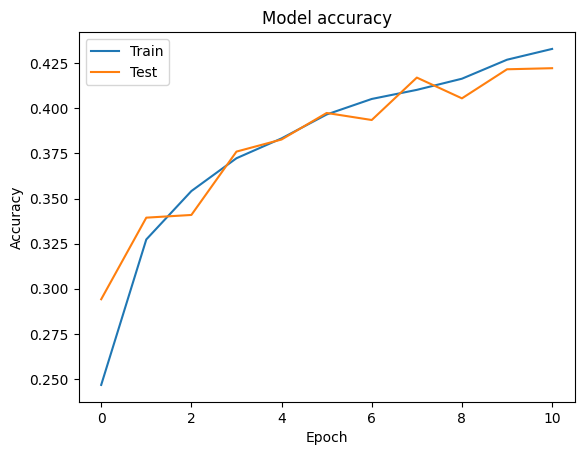

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     

334/391 [========================>.....] - ETA: 7s - loss: 2.1437 - accuracy: 0.2664